In [6]:
%pip install -q matplotlib networkx pandas torchinfo
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import functions
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from functools import partial

In [8]:
binary_results = functions.evaluate_directory("runs/num_layers_binary", 
                                              partial(functions.evaluate_mse_nse, on_ipu=True),
                                              lambda chkpt: chkpt["hparams"]["model"]["num_layers"])
isolated_results = functions.evaluate_directory("runs/num_layers_isolated",
                                                partial(functions.evaluate_mse_nse, on_ipu=True),
                                                lambda chkpt: chkpt["hparams"]["model"]["num_layers"])

Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:11<00:00, 1534.89it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:17<00:00, 1014.39it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:18<00:00, 962.41it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:15<00:00, 1163.16it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:15<00:00, 1101.16it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:12<00:00, 1420.03it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:20<00:00, 871.66it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:19<00:00, 891.30it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:10<00:00, 1721.82it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:12<00:00, 1402.83it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:16<00:00, 1058.05it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:10<00:00, 1644.81it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:10<00:00, 1746.10it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:19<00:00, 905.07it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:15<00:00, 1161.96it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:11<00:00, 1561.68it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:14<00:00, 1167.64it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:18<00:00, 954.24it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:12<00:00, 1411.02it/s]


Loading dataset into memory...


Testing: 100%|██████████| 17496/17496 [00:14<00:00, 1236.51it/s]


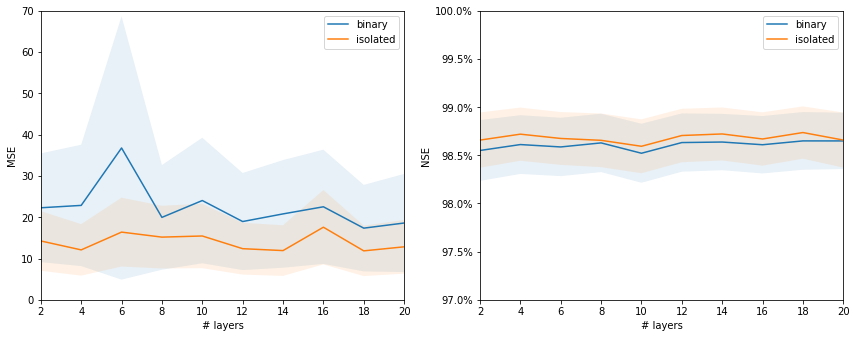

In [10]:
# 95% confidence interval
conf = lambda t:  1.96 * t.std() / (len(t) ** 0.5)
lo = lambda t: t.mean() - conf(t)
hi = lambda t: t.mean() + conf(t)

binary_keys, binary_vals = zip(*sorted(binary_results.items()))
binary_mse_means, binary_nse_means, binary_mse_hi, binary_nse_hi, binary_mse_lo, binary_nse_lo = zip(
    *[(m.mean(), n.mean(), hi(m), hi(n), lo(m), lo(n)) for m, n in binary_vals]
)
isolated_keys, isolated_vals = zip(*sorted(isolated_results.items()))
isolated_mse_means, isolated_nse_means, isolated_mse_hi, isolated_nse_hi, isolated_mse_lo, isolated_nse_lo = zip(
    *[(m.mean(), n.mean(), hi(m), hi(n), lo(m), lo(n)) for m, n in isolated_vals]
)

layer_nums = range(2, 21, 2)
plt.figure(figsize=(12, 4.8))
plt.subplot(1, 2, 1)
plt.plot(binary_keys, binary_mse_means, label="binary")
plt.fill_between(binary_keys, binary_mse_hi, binary_mse_lo, alpha=0.1)
plt.plot(isolated_keys, isolated_mse_means, label="isolated")
plt.fill_between(isolated_keys, isolated_mse_hi, isolated_mse_lo, alpha=0.1)
plt.xlim((min(layer_nums), max(layer_nums)))
plt.ylim((0, 70))
plt.xlabel("# layers")
plt.ylabel("MSE")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(binary_keys, binary_nse_means, label="binary")
plt.fill_between(binary_keys, binary_nse_hi, binary_nse_lo, alpha=0.1)
plt.plot(isolated_keys, isolated_nse_means, label="isolated")
plt.fill_between(isolated_keys, isolated_nse_hi, isolated_nse_lo, alpha=0.1)
plt.xlim((min(layer_nums), max(layer_nums)))
plt.ylim((0.97, 1))
plt.xlabel("# layers")
plt.ylabel("NSE")
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.tight_layout()
plt.savefig("num_layers.pdf")
plt.show()